# Numpy

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# make a table
a = np.array([1, 2, 3])
b = np.array(range(4))
c = np.arange(10)
d = np.linspace(0, 5, 10)
e = np.logspace(0, 5, 10, base = 10) # linspace on the power of the base
f = np.geomspace(1, 8, 4) # Arithmetic sequence

In [40]:
# specify the length and values in a table
g = np.zeros(2)
h = np.ones(3)
i = np.full(5, 3.8)
j = np.zeros_like(i) # transfer all elements to zerso
k = np.ones_like(i) # transfer all elements to one

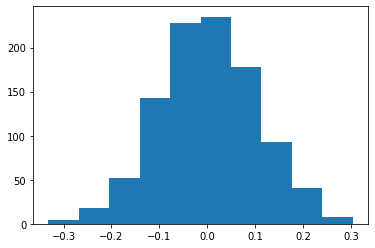

In [48]:
# create a table by following a distribution law
mu, sigma = 0, 0.1 # mean and standard deviation
l = np.random.normal(loc = mu, scale = sigma, size = 1000)
plt.hist(l)
plt.show()

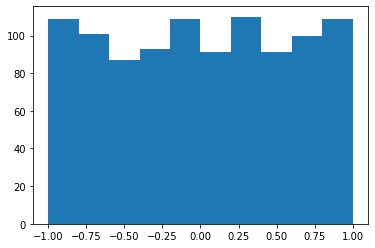

In [55]:
m = np.random.uniform(low = -1, high = 1, size = 1000)
plt.hist(m)
plt.show()

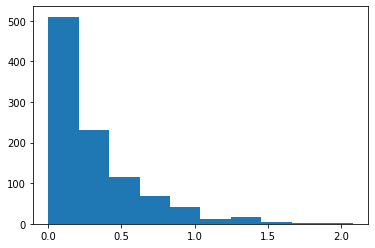

In [58]:
n = np.random.exponential(scale = .3, size = 1000)
plt.hist(n)
plt.show()

In [60]:
# Indexing and extraction
b[2]
b[1:2]
b[1:]
b[:2]
b[:-1]


2

# multidimensional array

In [79]:
a = np.array([[4, 5, 6], [7, 8, 9]])
b = np.zeros((3, 4, 2)) # three dimensions, from outside to inside
c = np.ones((3, 4))
d = np.full((2, 3), 3)
e = np.random.normal(loc=0, scale=1, size=(2, 3))

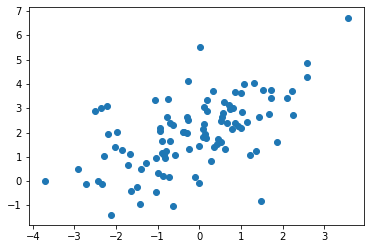

In [83]:
n = np.random.multivariate_normal(
        mean=[0, 2], 
        cov=[[2, 1], [1, 2]], 
        size=100) 
plt.scatter(n[:, 0], n[:, 1]) 
plt.show()

In [84]:
f = np.diag([1, 0, 1]) # Matrice diagonale de diagonale fixée 
g = np.eye(3) # Matrice identité d'ordre 3

In [87]:
A1 = np.array([[1], [-1], [0]]) 
A2 = np.array([-3, -2, 1])
A3 = np.full((3, 3), -2) + 2 * np.eye(3)

In [93]:
A3
A3.shape[0]
len(A3)

3

## Transformation

In [98]:
a.reshape((3, 2))
a.reshape((6, 1))

array([[4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [101]:
(1 + np.arange(8)).reshape((2, -1), order="F")

array([[1, 3, 5, 7],
       [2, 4, 6, 8]])

In [105]:
# add false dimension
a = np.array([1, 2, 3])
a.shape

(3,)

In [104]:
a.ndim

1

In [106]:
b = a[np.newaxis, :]
b.shape

(1, 3)

In [107]:
b.ndim

2

In [111]:
c = a[:, np.newaxis]
c

array([[1],
       [2],
       [3]])

In [112]:
b.squeeze()

array([1, 2, 3])

In [113]:
c.squeeze()

array([1, 2, 3])

In [115]:
# a function transfer a column matix into a row matrix
def transpose_vector(v):
    return v.squeeze()[np.newaxis, :]
a = np.array([[1], [2], [3]])
transpose_vector(a)

array([[1, 2, 3]])

In [120]:
# concatenation of two tables
d = np.array([9, 1])
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([d, 8, 9])
np.concatenate((a, b, c))

array([1, 2, 3, 4, 5, 6, array([9, 1]), 8, 9], dtype=object)

In [121]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9], [10, 11, 12]]) 
np.concatenate((a, b), axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [122]:
np.concatenate((a, b), axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [124]:
np.concatenate((a, b), axis=-1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [126]:
# concatenate matix by bloc
def matrix(A1, A2):
    A = np.concatenate((A1, -A2), axis = 1)
    B = np.concatenate((A2, A1), axis = 1)
    return np. concatenate((A, B), axis = 0)
matrix(np.diag([1,2]), np.diag([3,4]))

array([[ 1,  0, -3,  0],
       [ 0,  2,  0, -4],
       [ 3,  0,  1,  0],
       [ 0,  4,  0,  2]])

In [133]:
# matrix, vector and scalar
def matrix2(A, v, lbd):
    Av = np.concatenate((A, v[:, np.newaxis]), axis = 1)
    vlbd = np.concatenate((v, [lbd]))
    return np.concatenate((Av, vlbd[np.newaxis, :]))
matrix2(np.diag([1, 2]), np.array([3, 4]), 5)

array([[1, 0, 3],
       [0, 2, 4],
       [3, 4, 5]])

In [148]:
def circulant(row):
    n = len(row)
    c = np.tile(row, n-1)
    c = c.reshape((n, n-1))
    c = np.concatenate((c, row[::-1, np.newaxis]), axis=1)
    return c 

circulant(np.arange(6))

array([[0, 1, 2, 3, 4, 5],
       [5, 0, 1, 2, 3, 4],
       [4, 5, 0, 1, 2, 3],
       [3, 4, 5, 0, 1, 2],
       [2, 3, 4, 5, 0, 1],
       [1, 2, 3, 4, 5, 0]])

In [138]:
row = np.arange(6)
n = len(row)

In [146]:
c = np.tile(row, n-1)
c

array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5])

In [147]:
c = c.reshape((n, n-1))
c

array([[0, 1, 2, 3, 4],
       [5, 0, 1, 2, 3],
       [4, 5, 0, 1, 2],
       [3, 4, 5, 0, 1],
       [2, 3, 4, 5, 0],
       [1, 2, 3, 4, 5]])

In [160]:
# stack tables
a = np.array([1, 2])
b = np.array([3, 4])
np.stack((a, b))

array([[1, 2],
       [3, 4]])

In [162]:
a = np.diag([1, 2, 3])
b = np.diag([4, 5, 6])
np.stack((a, b), axis=-1)

array([[[1, 4],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [2, 5],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [3, 6]]])

In [163]:
np.stack((a, b), axis=0)

array([[[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]],

       [[4, 0, 0],
        [0, 5, 0],
        [0, 0, 6]]])

In [165]:
np.stack((a, b), axis=1)

array([[[1, 0, 0],
        [4, 0, 0]],

       [[0, 2, 0],
        [0, 5, 0]],

       [[0, 0, 3],
        [0, 0, 6]]])

## algebraic operation

In [168]:
a = np.diag([1, 2, 3])
b = np.diag([4, 5, 6]) 
np.dot(a, b)


array([[ 4,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 18]])

In [169]:
c = np.array([[1, 2], [3, 4]]) 
d = np.array([[0, 1], [1, 0]])
np.matmul(c, d)

array([[2, 1],
       [4, 3]])

In [170]:
np.transpose(c)

array([[1, 3],
       [2, 4]])

In [171]:
c.transpose()

array([[1, 3],
       [2, 4]])

In [172]:
c.T

array([[1, 3],
       [2, 4]])

In [173]:
c**2

array([[ 1,  4],
       [ 9, 16]])

In [181]:
def matrix(n, p):
    u = (1 + np.arange(n)).reshape(n, -1)
    v = (1 + np.arange(p)).reshape(p, -1) 
    return 1 / (u @ v.T)    

# Pandas

## Series
collection of the same type object

In [4]:
import pandas as pd

In [206]:
# It can be created by a python list or an one-dimensional Numpy array
a = pd.Series([1, 2, 3])
b = pd.Series(["foo", "bar", "baz"])
c = np.array([1, 2, 3]) 
d = pd.Series(c)

In [207]:
a.to_numpy

<bound method IndexOpsMixin.to_numpy of 0    1
1    2
2    3
dtype: int64>

In [208]:
# give name to a series
b = pd.Series(["foo", "bar", "baz"], name="Nom")

In [209]:
b

0    foo
1    bar
2    baz
Name: Nom, dtype: object

In [212]:
# We can change defaut index
age = pd.Series([23, 24, 24, 25],
                index=["Agathe", "Béatrice", "Cédric", "Donna"])
age["Donna"]

25

In [214]:
# change back to default index
age.reset_index(drop=True)

0    23
1    24
2    24
3    25
dtype: int64

In [215]:
# change index again
age.index = ["Ag", "Bé", "Cé", "Do"]
age

Ag    23
Bé    24
Cé    24
Do    25
dtype: int64

In [16]:
# get elements of a serie
age = pd.Series(
    [23, 24, 24, 25],
    index=["Agathe", "Béatrice", "Cédric", "Donna"],
    name="Age")
age

Agathe      23
Béatrice    24
Cédric      24
Donna       25
Name: Age, dtype: int64

In [6]:
age.loc["Agathe"]

23

In [8]:
age.iloc[0]

23

In [10]:
age.loc[["Agathe", "Donna"]]

Agathe    23
Donna     25
Name: Age, dtype: int64

In [11]:
age.iloc[[1, 3]]

Béatrice    24
Donna       25
Name: Age, dtype: int64

In [12]:
age.iloc[:-1]

Agathe      23
Béatrice    24
Cédric      24
Name: Age, dtype: int64

In [13]:
age.iloc[2:]

Cédric    24
Donna     25
Name: Age, dtype: int64

In [14]:
age.loc["Cédric":]

Cédric    24
Donna     25
Name: Age, dtype: int64

In [15]:
age.loc["Béatrice":"Donna"]

Béatrice    24
Cédric      24
Donna       25
Name: Age, dtype: int64

In [17]:
# with a step size of 2
age.loc["Agathe":"Donna":2]

Agathe    23
Cédric    24
Name: Age, dtype: int64

In [23]:
masque = [True, False, False, True]
age.loc[masque]

Agathe    23
Donna     25
Name: Age, dtype: int64

In [29]:
masque = pd.Series([True, False, False, True])
masque.index = age.index
masque

Agathe       True
Béatrice    False
Cédric      False
Donna        True
dtype: bool

In [30]:
age.loc[masque]

Agathe    23
Donna     25
Name: Age, dtype: int64

In [33]:
# creat a mask from other series
mask = age > 23
mask

Agathe      False
Béatrice     True
Cédric       True
Donna        True
Name: Age, dtype: bool

In [34]:
age.loc[mask]

Béatrice    24
Cédric      24
Donna       25
Name: Age, dtype: int64

In [38]:
s1 = pd.read_csv("/Users/yunfei/Desktop/GI05/SY09/td/TP00_Introduction_a_Numpy_et_Pandas-enonce/data/s1.csv",
                index_col=0,
                squeeze=True)


In [42]:
s1.loc[s1 > 100000].index

Index(['LUCAS', 'EMMA'], dtype='object', name='preusuel')

In [43]:
s1.loc[:"SACHA"].sum()

3231384

# DataFrame

In [46]:
col1 = np.array([23, 24, 24, 25])
col2 = ["Agathe", "Béatrice", "Cédric", "Donna"]
pd.DataFrame({
    "Age": col1,
    "Nom": col2
})

,Age,Nom
0,23,Agathe
1,24,Béatrice
2,24,Cédric
3,25,Donna


In [49]:
age = pd.Series([23, 24, 24, 25])
name = pd.Series(["Agathe", "Béatrice", "Cédric", "Donna"])
pd.DataFrame({ 
    "Age": age, 
    "Nom": name
})

,Age,Nom
0,23,Agathe
1,24,Béatrice
2,24,Cédric
3,25,Donna


In [50]:
# index of each series is used to build a common index
age = pd.Series([23, 24, 24, 25], index=[0, 1, 2, 3])
nom = pd.Series(["Agathe", "Béatrice", "Cédric", "Donna"], index=[2, 3, 4, 5]) 
pd.DataFrame({
    "Age": age,
    "Nom": nom 
})

,Age,Nom
0,23.0,NaN
1,24.0,NaN
2,24.0,Agathe
3,25.0,Béatrice
4,NaN,Cédric
5,NaN,Donna


In [52]:
pd.read_csv("/Users/yunfei/Desktop/GI05/SY09/td/TP00_Introduction_a_Numpy_et_Pandas-enonce/data/s1.csv")

,preusuel,nombre
0,LUCAS,117001
1,EMMA,105209
2,ENZO,97980
3,LÉA,96491
4,HUGO,91960
...,...,...
995,KELIAN,1984
996,JAD,1983
997,THELMA,1982
998,MANELLE,1981


In [53]:
# convert a DataFrame to a Bidimensionnel Numpy array
col1 = np.array([23, 24, 24, 25])
col2 = ["Agathe", "Béatrice", "Cédric", "Donna"] 
df = pd.DataFrame({
    "Age": col1,
    "Nom": col2
})
df.to_numpy()

array([[23, 'Agathe'],
       [24, 'Béatrice'],
       [24, 'Cédric'],
       [25, 'Donna']], dtype=object)

In [63]:
df.columns
df.shape
len(df)
df.dtypes
df.info

<bound method DataFrame.info of    Age       Nom
0   23    Agathe
1   24  Béatrice
2   24    Cédric
3   25     Donna>

In [67]:
# change Indexstewastesssssssssssssco
df.set_index("Nom")

,Age
Nom,
Agathe,23
Béatrice,24
Cédric,24
Donna,25


In [72]:
df.Age
df["Age"]
df[["Age", "Nom"]]

,Age,Nom
0,23,Agathe
1,24,Béatrice
2,24,Cédric
3,25,Donna


In [76]:
df.loc[df.Age >= 24]
df.iloc[[2, 3]]

,Age,Nom
2,24,Cédric
3,25,Donna


In [81]:
df.loc[df.Age >= 24, ["Nom"]]
df.drop(columns=["Age"])
df

,Age,Nom
0,23,Agathe
1,24,Béatrice
2,24,Cédric
3,25,Donna
